In [26]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

The best dev set accuracy is 0.343634
The corresponding train accuracy is 0.337700
This was recorded on epoch 1100


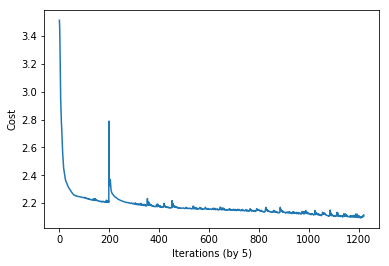

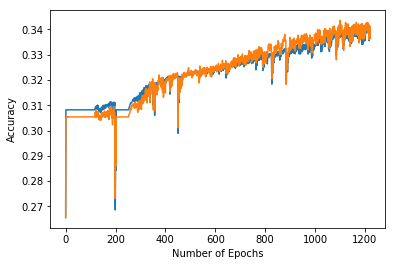

In [61]:
###################################################
# RETRIEVE AND PLOT THE MODEL'S TRAINING PROGRESS #
###################################################

trial_number = 31
hyperparameter_data = pd.read_excel('Trials/Hyperparameters.xlsx')
this_trial = hyperparameter_data.loc[hyperparameter_data['Trial #'] == trial_number]
if len(this_trial) != 0:
    costs = np.array(json.loads(this_trial['Epoch Costs'].values[0]))
    train_accuracies = np.array(json.loads(this_trial['Epoch Train Accuracies'].values[0]))
    dev_accuracies = np.array(json.loads(this_trial['Epoch Dev Accuracies'].values[0]))
    
    # Print best dev accuracy and corresponding test accuracy
    best_dev_index = np.argmax(dev_accuracies)
    print('The best dev set accuracy is %f' % dev_accuracies[best_dev_index])
    print('The corresponding train accuracy is %f' % train_accuracies[best_dev_index])
    print('This was recorded on epoch %d' % best_dev_index)

    # Plot cost
    cost_line, = plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (by 5)')
    # plt.title('Learning rate = ' + str(learning_rate))
    plt.show()

    # Plot train and dev accuracy
    train_line, = plt.plot(np.squeeze(train_accuracies))
    dev_line, = plt.plot(np.squeeze(dev_accuracies))
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Epochs')
    # plt.title('Learning rate = ' + str(learning_rate))
    plt.show()
else:
    print("Trial not recorded.")